# Project Overview

This project aims to predict stock prices using historical data and machine learning techniques, primarily using the XGBoost model. The goal is to estimate future stock closing prices and evaluate model performance with regression metrics.

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("TCS.csv")

## Data Preview

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

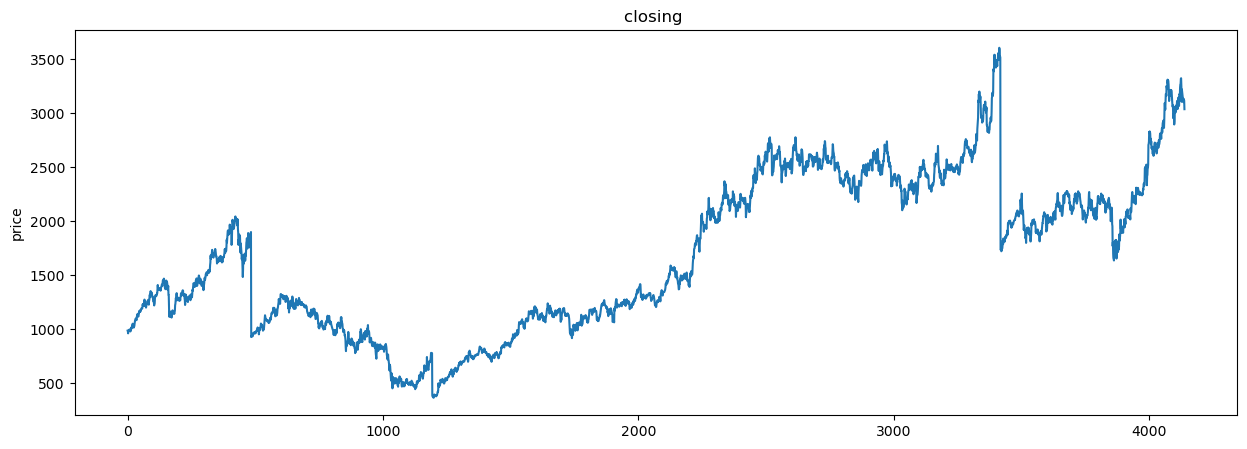

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title("closing ")
plt.ylabel("price")
plt.show()

In [7]:
df=df.drop(['Trades'],axis=1)

In [8]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

## Graphs

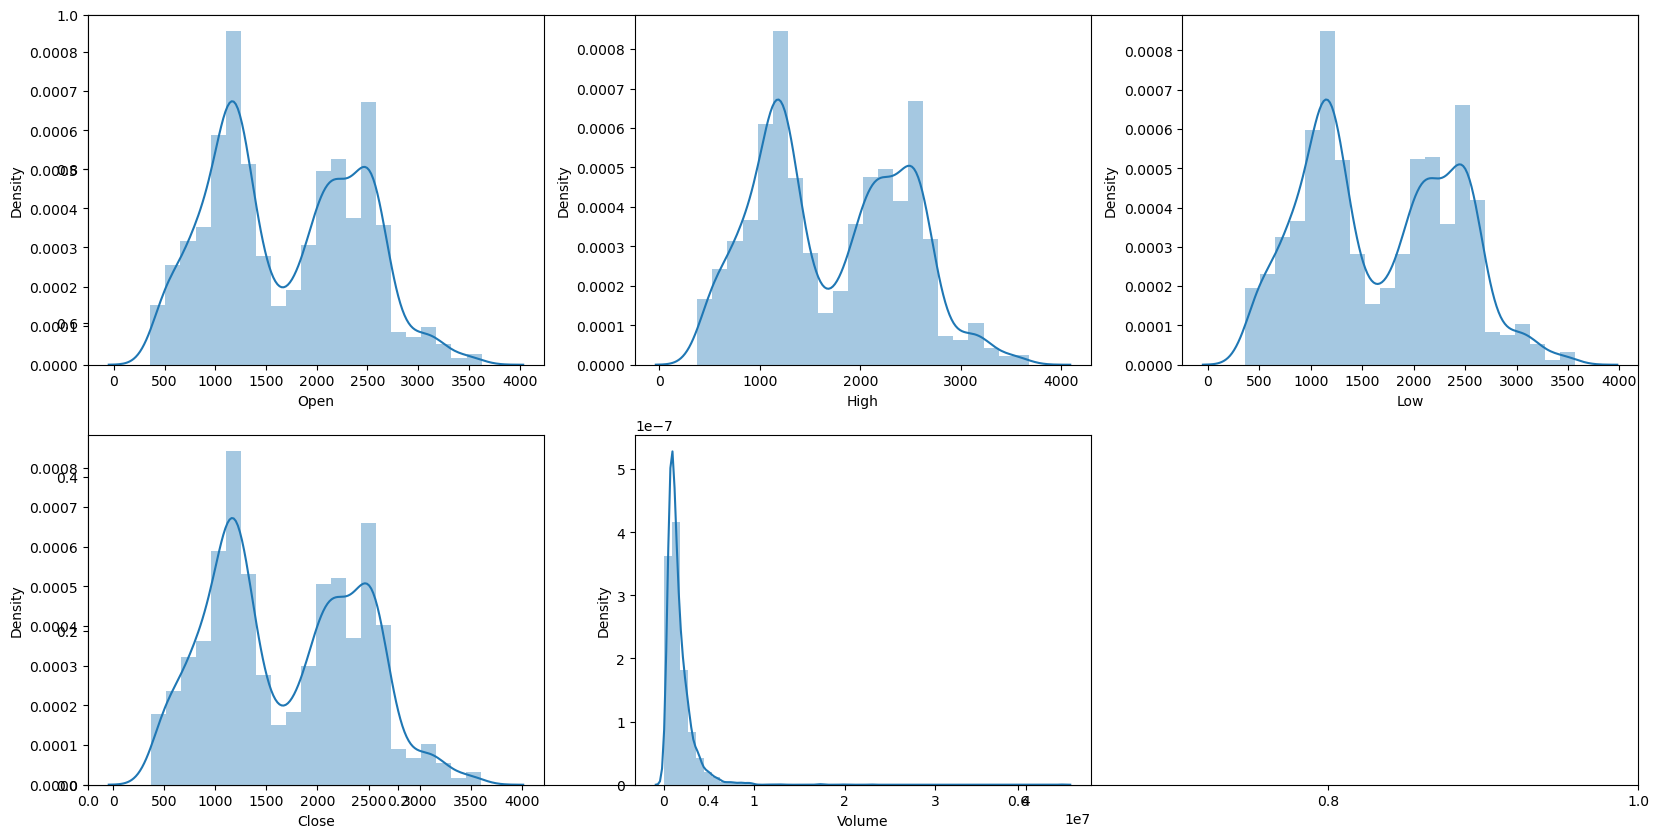

In [9]:
features=['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

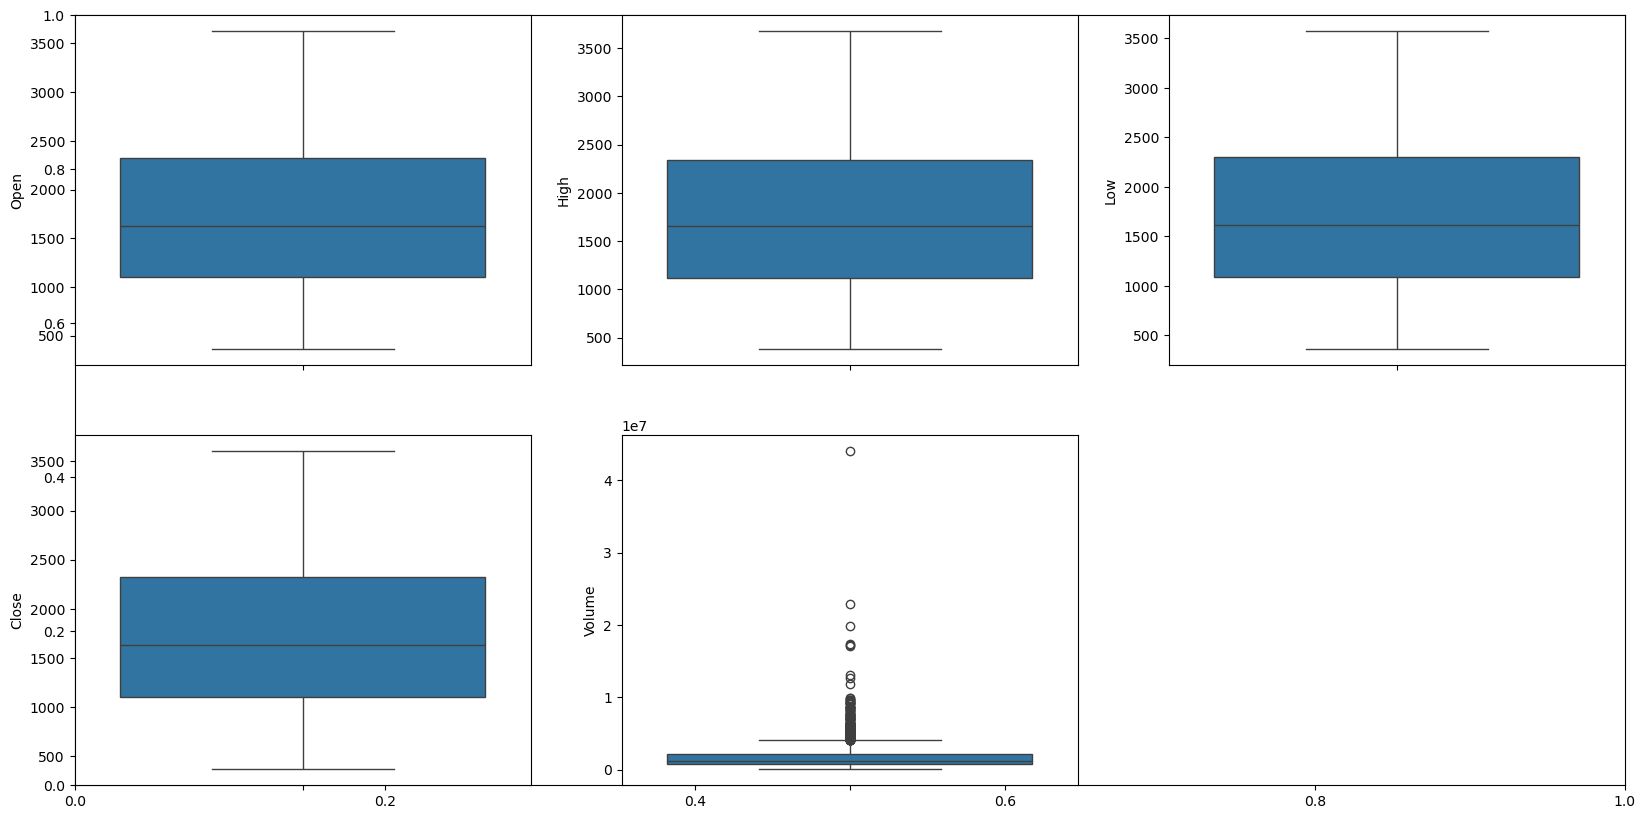

In [10]:

plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [11]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,3.155626e+07,0.962200


In [12]:
print(df['Date'].dtype)


object


In [13]:
splitted=df['Date'].str.split('-',expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042,25,8,2004
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561,26,8,2004
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549,27,8,2004
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294,30,8,2004
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624,31,8,2004


In [14]:
df['quarter_end']=np.where(df['month']%3==0,1,0)

In [15]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year,quarter_end
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042,25,8,2004,0
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561,26,8,2004,0
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549,27,8,2004,0
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294,30,8,2004,0
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624,31,8,2004,0


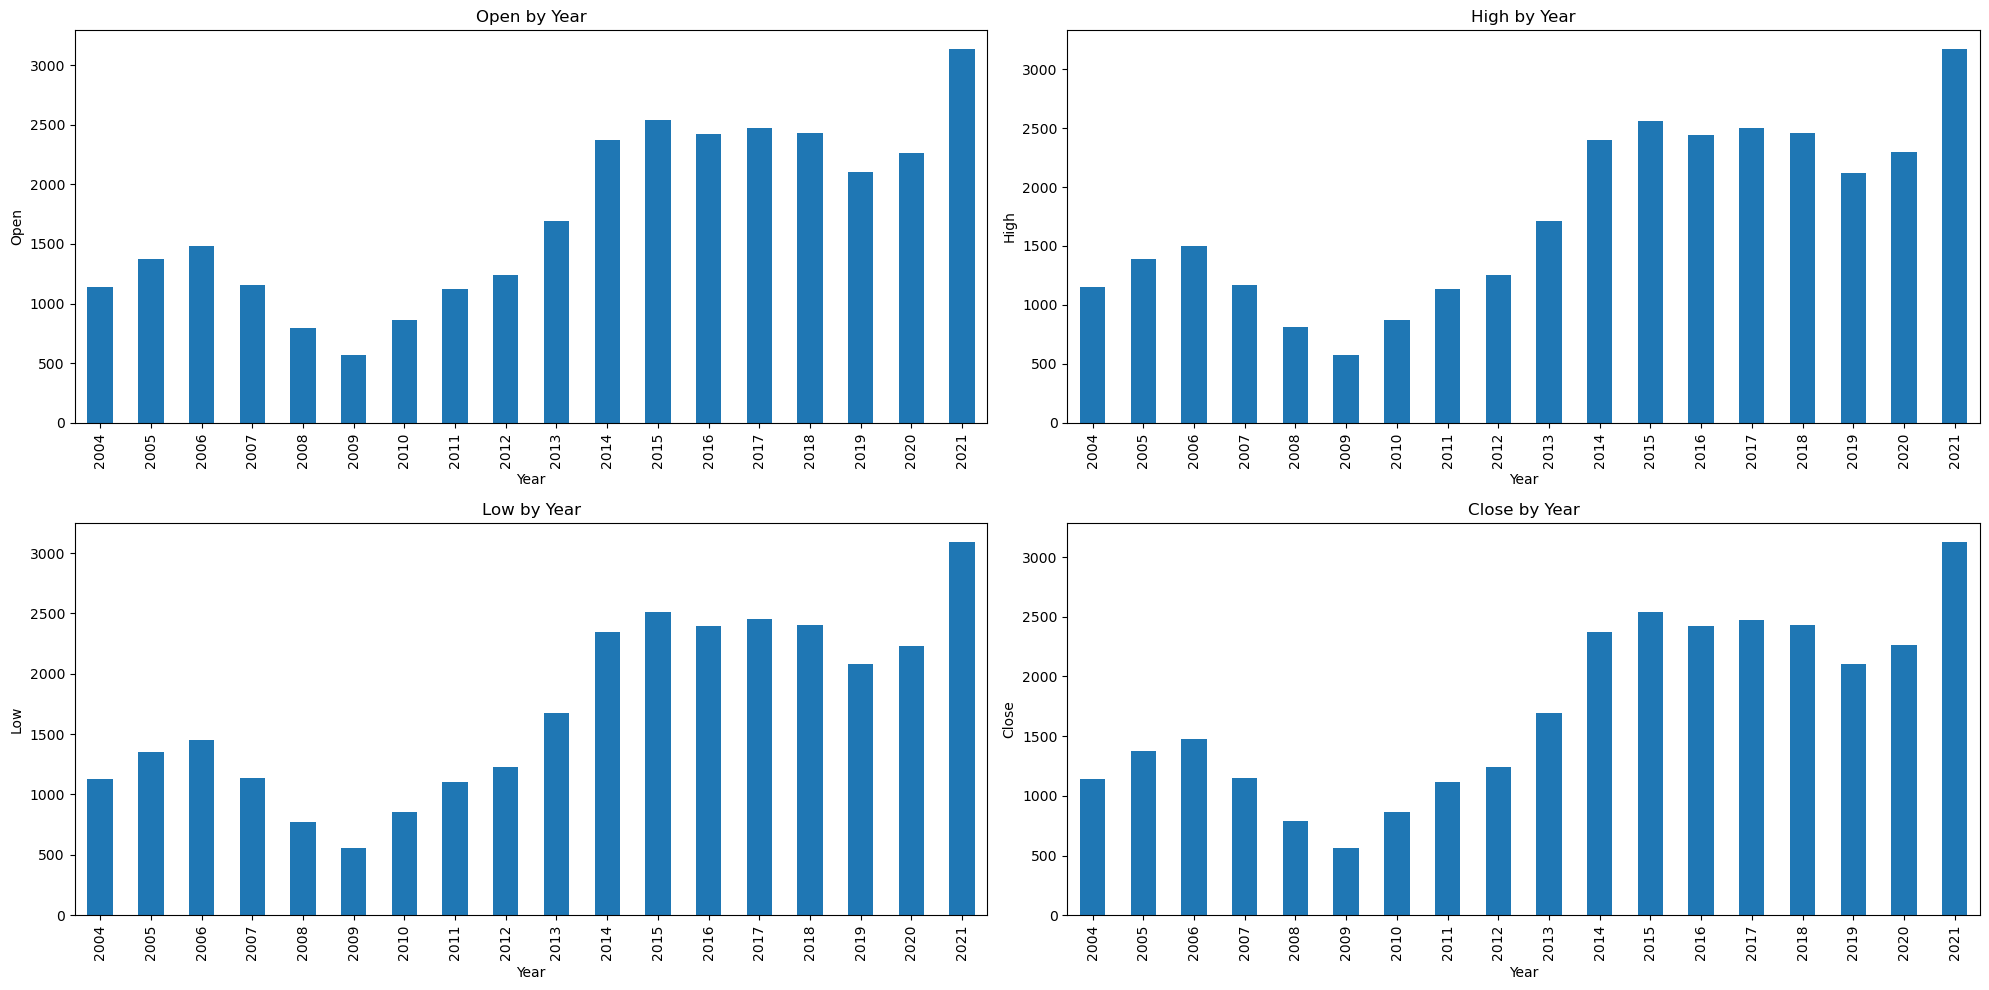

In [16]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

if 'year' not in df.columns and 'Date' in df.columns:
    df['year'] = pd.to_datetime(df['Date']).dt.year

df_clean = df.dropna(subset=['Open', 'High', 'Low', 'Close', 'year'])

df_clean['year'] = df_clean['year'].astype('category')

data_grouped = df_clean.groupby('year').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean'
})

plt.figure(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
    plt.title(f'{col} by Year')
    plt.ylabel(col)
    plt.xlabel('Year')

plt.tight_layout() 
plt.show()


In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns

result = df.drop('Date', axis=1)[numeric_cols].groupby('quarter_end').mean()

agg_dict = {}
for col in df.columns:
    if col != 'Date' and col != 'quarter_end':
        if df[col].dtype.kind in 'bifc':  # Check if column is numeric
            agg_dict[col] = 'mean'
        else:
            agg_dict[col] = 'count'  # or 'first', 'last', etc.

result = df.drop('Date', axis=1).groupby('quarter_end').agg(agg_dict)

In [18]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

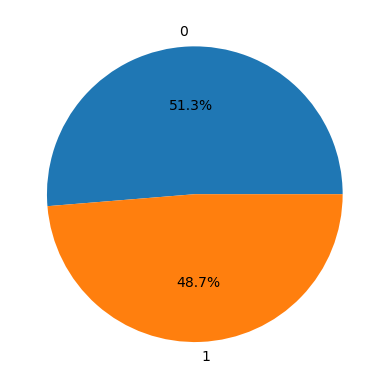

In [19]:
plt.pie(df['target'].value_counts().values,
       labels=[0,1],autopct='%1.1f%%')
plt.show()

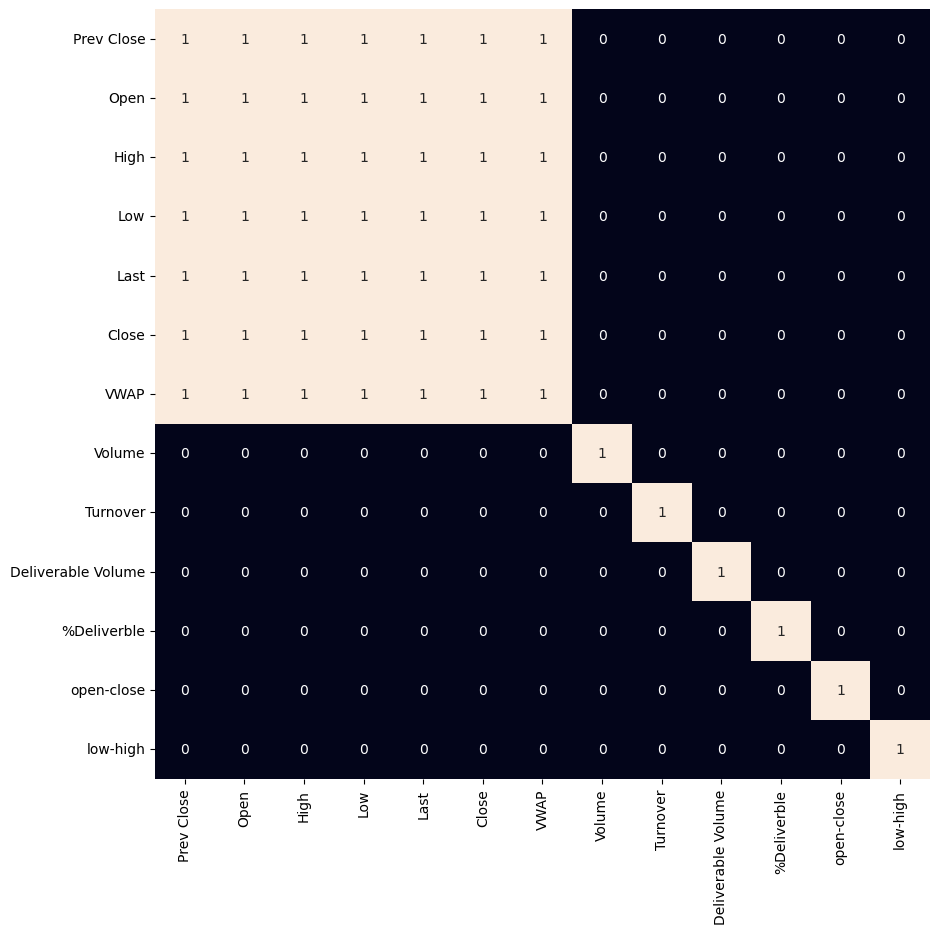

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 10)) 

sb.heatmap(numeric_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [21]:
features=df[['open-close','low-high','quarter_end']]
target=df['target']

scaler=StandardScaler()
features=scaler.fit_transform(features)
X_train,X_valid,y_train,y_valid=train_test_split(features,target,test_size=0.1,random_state=2022)
print(X_train.shape,X_valid.shape)

(3725, 3) (414, 3)


In [22]:
df['Prev_close']=df['Close'].shift(1)
df['Return']=df['Close'].pct_change()
df['5_day_MA']=df['Close'].rolling(window=5).mean()
df['10_day_MA']=df['Close'].rolling(window=10).mean()

In [23]:
df['Target'] = df['Close'].shift(-1)

## Splitting Features

In [24]:
features=['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Prev_close',
            'Return', '5_day_MA', '10_day_MA', 'day', 'month', 'year']

X=df[features]
y=df['Target']

split_idx=int(0.8*len(df))
X_train, X_valid = X[:split_idx], X[split_idx:]
y_train, y_valid = y[:split_idx], y[split_idx:]

In [25]:
print("Available columns:", df.columns.tolist())

Available columns: ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble', 'day', 'month', 'year', 'quarter_end', 'open-close', 'low-high', 'target', 'Prev_close', 'Return', '5_day_MA', '10_day_MA', 'Target']


In [26]:
df.dropna(inplace=True)

In [27]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.dropna(inplace=True)

X_train = train_df[features]
y_train = train_df['Target']

In [28]:
X_valid = X_valid[~y_valid.isna()]
y_valid = y_valid.dropna()

In [29]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in X_valid:", np.isnan(X_valid).sum())
print("Missing values in y_valid:", np.isnan(y_valid).sum())

Missing values in X_train: Open          0
High          0
Low           0
Close         0
VWAP          0
Volume        0
Prev_close    0
Return        0
5_day_MA      0
10_day_MA     0
day           0
month         0
year          0
dtype: int64
Missing values in y_train: 0
Missing values in X_valid: Open          0
High          0
Low           0
Close         0
VWAP          0
Volume        0
Prev_close    0
Return        0
5_day_MA      0
10_day_MA     0
day           0
month         0
year          0
dtype: int64
Missing values in y_valid: 0


In [30]:
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
#rsi
df['RSI']=RSIIndicator(df['Close']).rsi()

#macd
macd=MACD(close=df['Close'])
df['MACD']=macd.macd()
df['MACD_Signal'] = macd.macd_signal()

#bollinger bands
bb = BollingerBands(close=df['Close'])
df['bb_upper'] = bb.bollinger_hband()
df['bb_lower'] = bb.bollinger_lband()

## Cat Boost

In [31]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=0, iterations=500, learning_rate=0.05)
cat.fit(X_train, y_train)
y_pred_train = cat.predict(X_train)
y_pred_valid = cat.predict(X_valid)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_valid, y_pred_valid))
print("RMSE:", mean_squared_error(y_valid, y_pred_valid, squared=False))
print("R² Score:", r2_score(y_valid, y_pred_valid))

MAE: 126.02366062059876
RMSE: 231.8001749612598
R² Score: 0.7612889205298139


## XGBREGRESSOR

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
base_model=XGBRegressor(random_state=42)
random_search=RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
    
)
random_search.fit(X_train,y_train)

best_model=random_search.best_estimator_

y_pred=best_model.predict(X_valid)

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("RMSE:", mean_squared_error(y_valid, y_pred, squared=False))
print("R² Score:", r2_score(y_valid, y_pred))
print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
MAE: 122.70421817138377
RMSE: 229.40587517627014
R² Score: 0.7661948192721872
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_valid, y_pred))
print("RMSE:", mean_squared_error(y_valid, y_pred, squared=False))
print("R² Score:", r2_score(y_valid, y_pred))

MAE: 122.70421817138377
RMSE: 229.40587517627014
R² Score: 0.7661948192721872


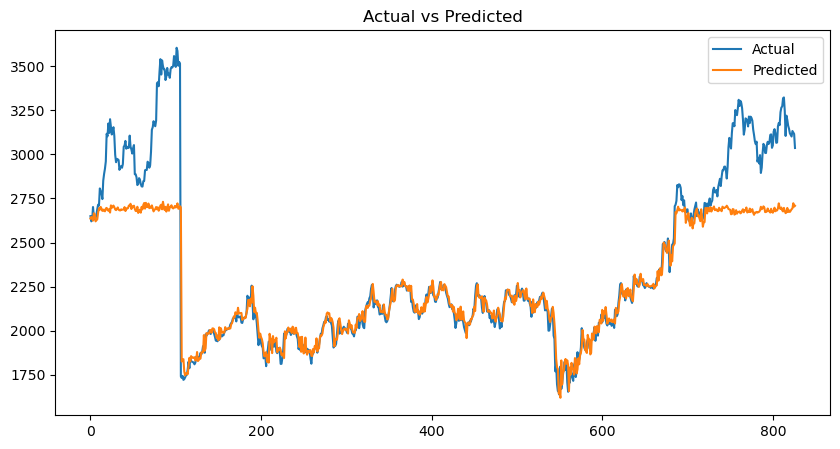

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_valid.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

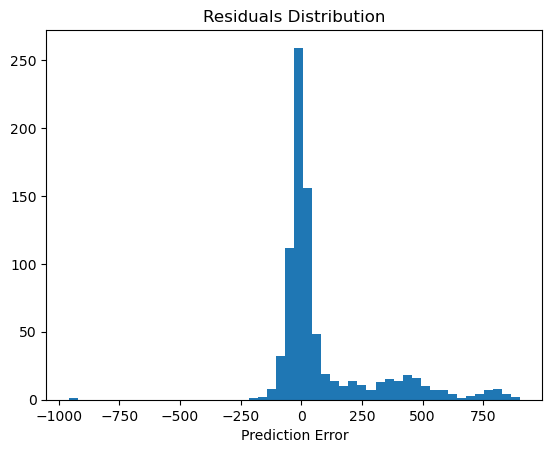

In [35]:
residuals = y_valid - y_pred
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

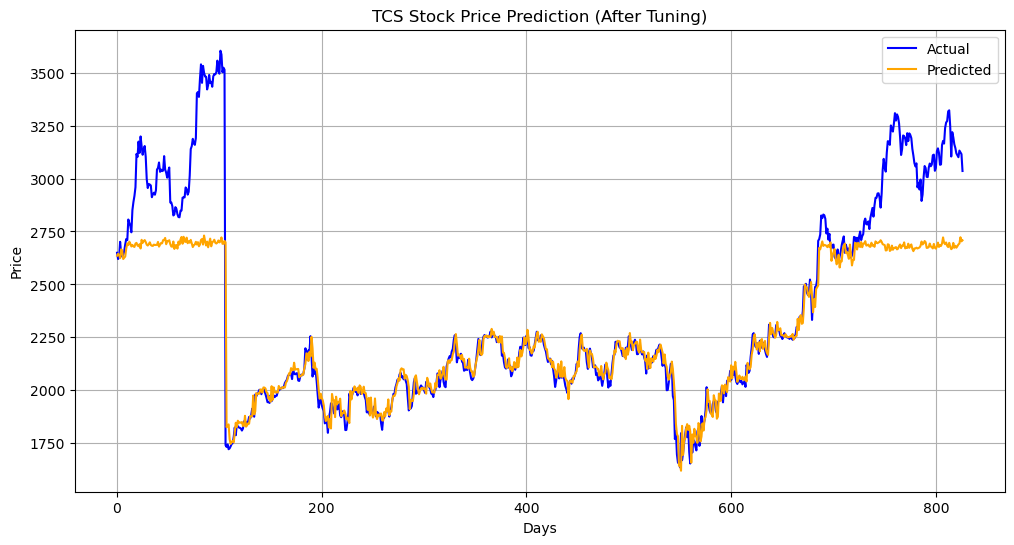

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_valid.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title("TCS Stock Price Prediction (After Tuning)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()